In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import hdbscan
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

# Load the saved sparse matrix
data_prepared = sparse.load_npz('data_prepared_final.npz')


# Optional: convert to dense if data is small enough
data_prepared_dense = data_prepared.toarray()

# Print original shape
print("Original data shape:", data_prepared_dense.shape)

# Optional: Reduce dimensionality (recommended for high-dim datasets before HDBSCAN)
svd = TruncatedSVD(n_components=14, random_state=42)
data_reduced = svd.fit_transform(data_prepared_dense)

# Run HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, metric='euclidean')
labels = clusterer.fit_predict(data_reduced)

# Number of clusters (excluding noise points labeled -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")

# Optional: Silhouette score (only if more than 1 cluster and no/all noise)
if n_clusters > 1 and len(set(labels)) < len(data_reduced):
    score = silhouette_score(data_reduced, labels)
    print(f"Silhouette Score: {score:.4f}")

Original data shape: (16468, 14275)


c:\Users\ahmed\Desktop\AI\data visualisation\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ahmed\Desktop\AI\data visualisation\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Number of clusters found: 96
Silhouette Score: 0.5750


C:\Users\ahmed\AppData\Local\Temp\ipykernel_15680\2023797284.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))
C:\Users\ahmed\AppData\Local\Temp\ipykernel_15680\2023797284.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_2d[mask, 0], data_2d[mask, 1], s=10, label=f'Cluster {label}', cmap=colors)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_15680\2023797284.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


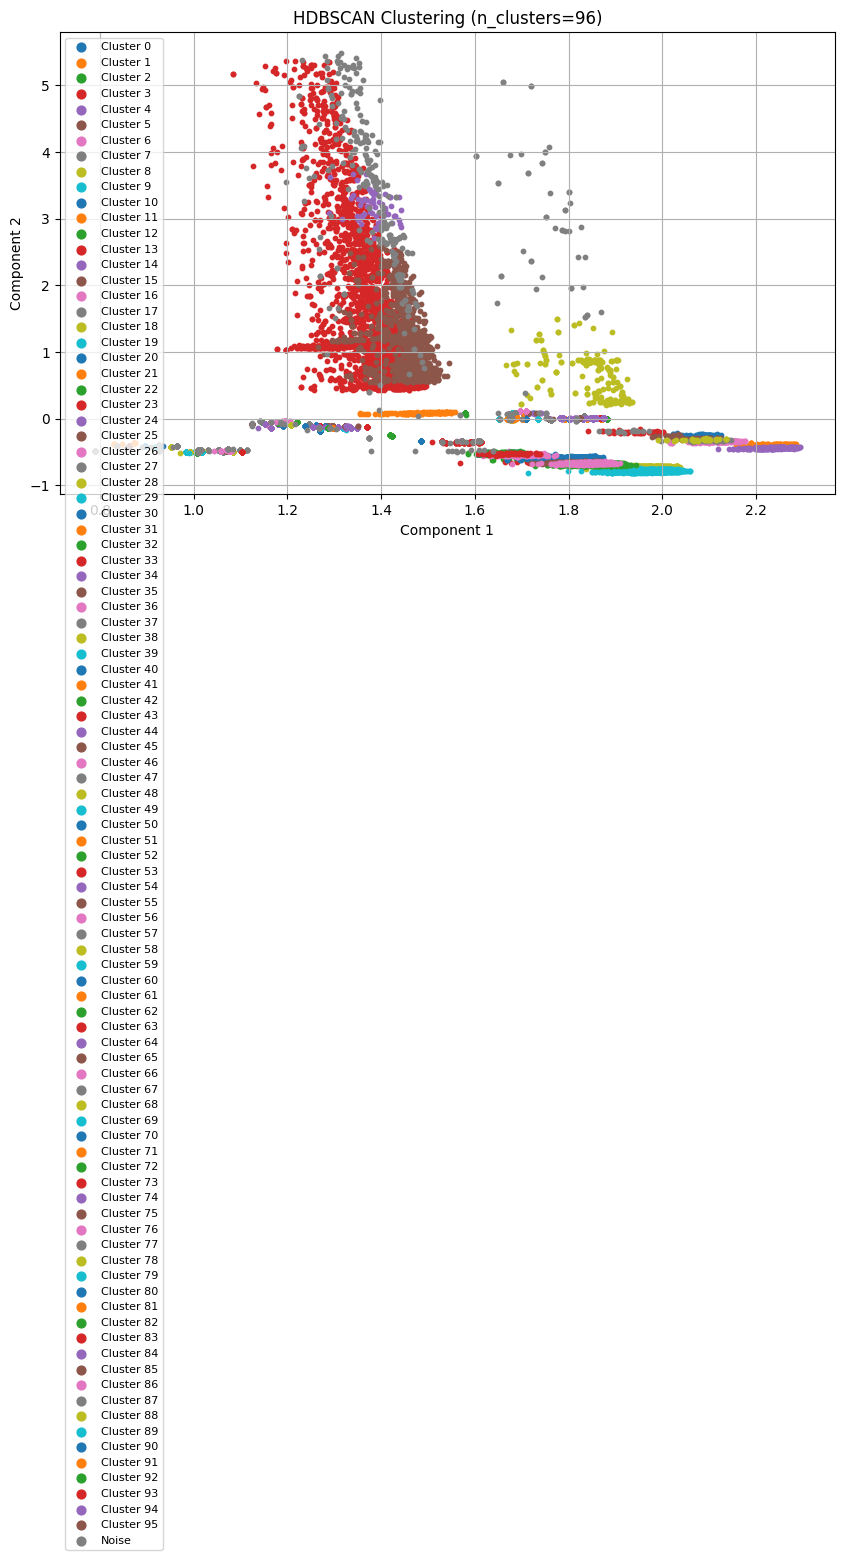

In [2]:
# Further reduce to 2D for visualization
svd_2d = TruncatedSVD(n_components=2, random_state=42)
data_2d = svd_2d.fit_transform(data_reduced)

# Plot clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    mask = (labels == label)
    if label == -1:
        # Noise points
        plt.scatter(data_2d[mask, 0], data_2d[mask, 1], c='gray', s=10, label='Noise')
    else:
        plt.scatter(data_2d[mask, 0], data_2d[mask, 1], s=10, label=f'Cluster {label}', cmap=colors)

plt.title(f"HDBSCAN Clustering (n_clusters={n_clusters})")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(markerscale=2, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()